<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/MNIST_Classifier_Augmentation_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Libraries




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

### Define the Function to Display Images

In [ ]:
def display_images(original_images, augmented_images, num_images=5):
    plt.figure(figsize=(10, 5))

    for i in range(num_images):
        # Display original images
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display augmented images
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
        plt.title("Augmented")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


### Load and Preprocess the MNIST Dataset

In [ ]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Define the CNN Model Function

In [ ]:
def create_cnn_model():
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

### Train the First CNN Model (CNN1)

In [ ]:
# Train the first CNN model (CNN1)
cnn1 = create_cnn_model()
history_cnn1 = cnn1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7419 - loss: 0.7747 - val_accuracy: 0.9722 - val_loss: 0.0920
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9465 - loss: 0.1782 - val_accuracy: 0.9833 - val_loss: 0.0585
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9606 - loss: 0.1292 - val_accuracy: 0.9847 - val_loss: 0.0524
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9690 - loss: 0.1043 - val_accuracy: 0.9853 - val_loss: 0.0505
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9737 - loss: 0.0857 - val_accuracy: 0.9887 - val_loss: 0.0437
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9766 - loss: 0.0769 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0633 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9792 - loss: 0.0626 - val_accuracy: 0

### Plot the Validation Accuracy and Loss for CNN1

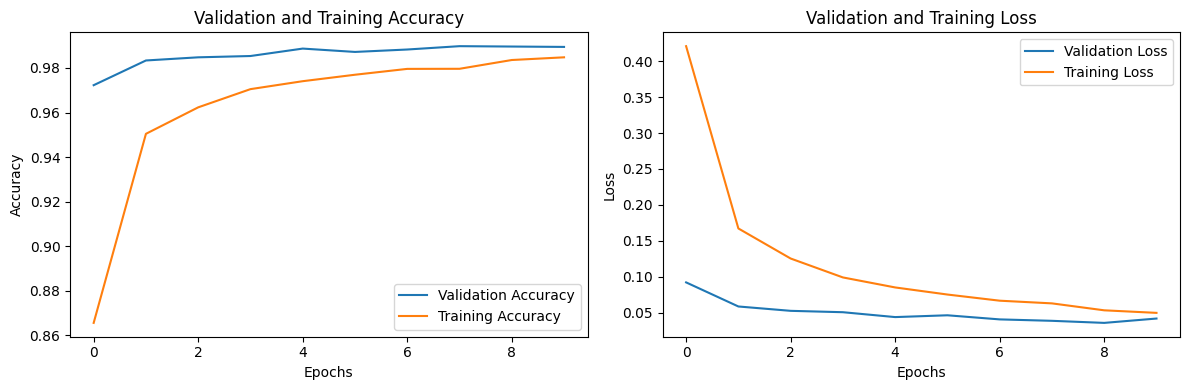

In [ ]:
# Plot the validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_cnn1.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation and Training Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.plot(history_cnn1.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation and Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Augment Training Data and Display Images

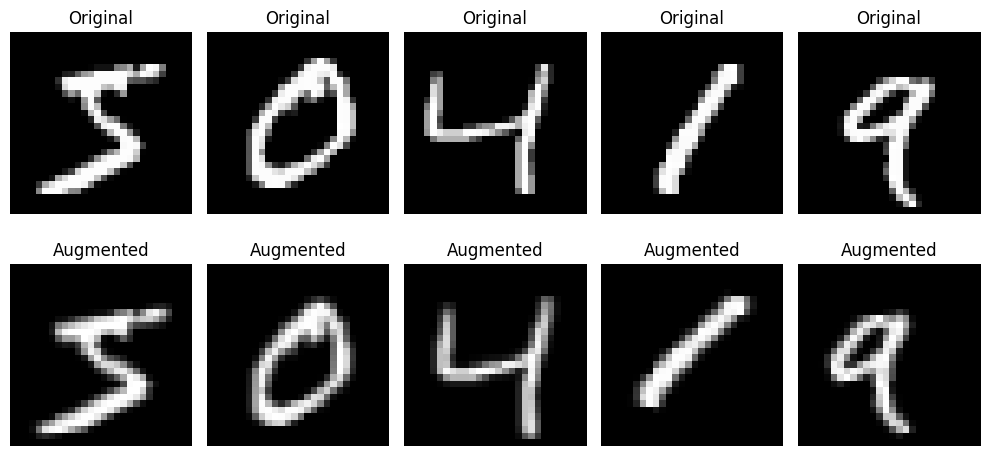

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1
)
# Generate augmented images
augmented_images, augmented_labels = next(datagen.flow(train_images[:10], train_labels[:10], batch_size=10, shuffle=False))

# Display original and augmented images before training CNN2
display_images(train_images[:10], augmented_images)


### Combine Original and Augmented Data for Training CNN2

In [ ]:
# Generate a larger augmented dataset
augmented_train_images = []
augmented_train_labels = []

for _ in range(len(train_images) // 64):
    aug_images, aug_labels = next(datagen.flow(train_images, train_labels, batch_size=64, shuffle=False))
    augmented_train_images.append(aug_images)
    augmented_train_labels.append(aug_labels)

augmented_train_images = np.concatenate(augmented_train_images)
augmented_train_labels = np.concatenate(augmented_train_labels)

# Concatenate the original and augmented datasets
combined_train_images = np.concatenate((train_images, augmented_train_images))
combined_train_labels = np.concatenate((train_labels, augmented_train_labels))

# Split the augmented data into training and validation sets
aug_train_images, aug_val_images, aug_train_labels, aug_val_labels = train_test_split(combined_train_images, combined_train_labels, test_size=0.2)

### Train the Second CNN Model (CNN2)

In [ ]:
cnn2 = create_cnn_model()
history_cnn2 = cnn2.fit(aug_train_images, aug_train_labels, epochs=10, batch_size=64, validation_data=(aug_val_images, aug_val_labels))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8110 - loss: 0.5791 - val_accuracy: 0.9886 - val_loss: 0.0446
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9686 - loss: 0.1096 - val_accuracy: 0.9917 - val_loss: 0.0316
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9791 - loss: 0.0735 - val_accuracy: 0.9932 - val_loss: 0.0265
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0553 - val_accuracy: 0.9942 - val_loss: 0.0231
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0490 - val_accuracy: 0.9942 - val_loss: 0.0240
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accuracy: 0.9948 - val_loss: 0.0213
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9941 - val_loss: 0.0236
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9918 - loss: 0.0307 -

### Plot the Validation Accuracy and Loss for CNN2

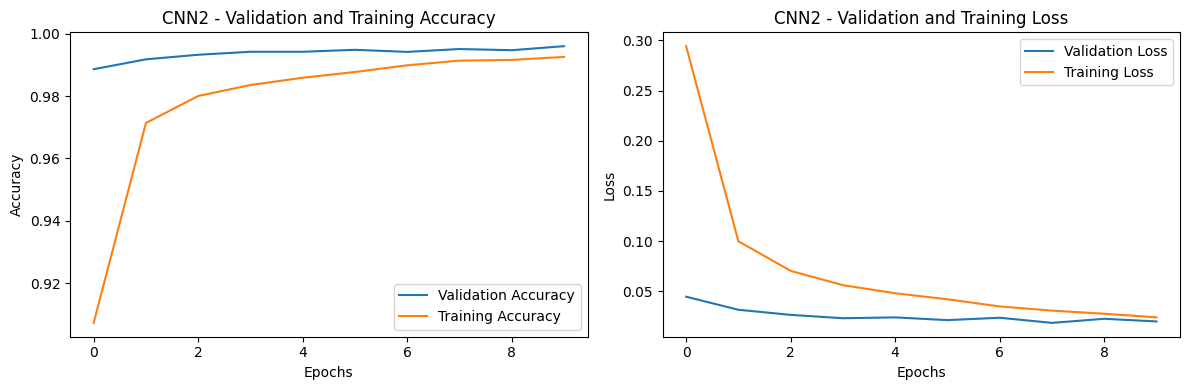

In [ ]:
plt.figure(figsize=(12, 4))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_cnn2.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN2 - Validation and Training Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.plot(history_cnn2.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN2 - Validation and Training Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Evaluate CNN1 and CNN2 on Original and Augmented Test Sets

In [ ]:
# Define data augmentation for the test set
test_datagen = datagen.flow(test_images, test_labels, batch_size=64, shuffle=False)

# Generate augmented test set
augmented_test_images = []
augmented_test_labels = []

for _ in range(len(test_images) // 64):
    aug_images, aug_labels = next(test_datagen)
    augmented_test_images.append(aug_images)
    augmented_test_labels.append(aug_labels)

augmented_test_images = np.concatenate(augmented_test_images)
augmented_test_labels = np.concatenate(augmented_test_labels)

# Evaluate CNN1 on original and augmented test sets
test_loss, test_acc = cnn1.evaluate(test_images, test_labels)
aug_test_loss, aug_test_acc = cnn1.evaluate(augmented_test_images, augmented_test_labels)

print(f"Original test accuracy for CNN1: {test_acc:.4f}, Augmented test accuracy for CNN1: {aug_test_acc:.4f}")

# Evaluate CNN2 on original and augmented test sets
test_loss2, test_acc2 = cnn2.evaluate(test_images, test_labels)
aug_test_loss2, aug_test_acc2 = cnn2.evaluate(augmented_test_images, augmented_test_labels)

print(f"Original test accuracy for CNN2: {test_acc2:.4f}, Augmented test accuracy for CNN2: {aug_test_acc2:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0324
312/312 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.3840
Original test accuracy for CNN1: 0.9918, Augmented test accuracy for CNN1: 0.9128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0344
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.2096
Original test accuracy for CNN2: 0.9924, Augmented test accuracy for CNN2: 0.9614
